## 💪 Challenge
### Create a report to answer your colleague's questions. Include:

### 1. What are the total sales for each payment method?
### 2. What is the average unit price for each product line?
### 3. Create plots to visualize findings for questions 1 and 2.
### 4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
### 5. Summarize your findings.

In [ ]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
df.head()
#first 5 first datapoints

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## data columns: 
### "date" -> The date, from June to August 2021.
### "warehouse" -> The company operates three warehouses: North, Central, and West.
### "client_type" -> There are two types of customers: Retail and Wholesale.
### "product_line" -> Type of products purchased.
### "quantity" -> How many items were purchased.
### "unit_price" -> Price per item sold.
### "total" -> Total sale = quantity * unit_price.
### "payment" -> How the client paid: Cash, Credit card, Transfer.

# Statistical summary


In [ ]:

df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

# Extracting Day and Month name from date

In [ ]:
df["Week_day"]=df["date"].dt.day_name()
df["Month"]=df["date"].dt.month_name()

# What are the total sales for each payment method?


In [ ]:
df.groupby('payment')[['total']].sum().reset_index().sort_values('total',ascending=False)

,payment,total
2,Transfer,159642.33
1,Credit card,110271.57
0,Cash,19199.10


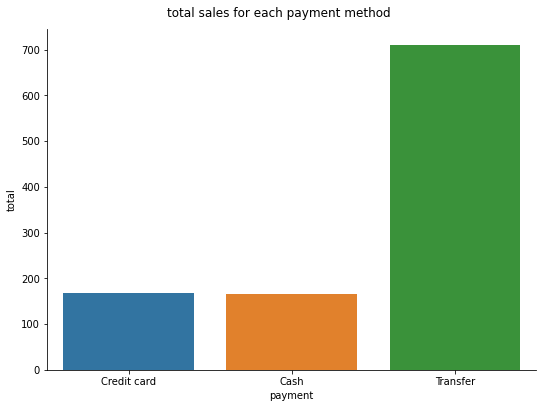

In [ ]:
g=sns.catplot(x='payment',y='total',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)

g.fig.suptitle("total sales for each payment method",y=1.03)


plt.show()


# 2. What is the average unit price for each product line?

In [ ]:
df.groupby('product_line')[['unit_price']].mean().reset_index().sort_values('unit_price',ascending=False)


,product_line,unit_price
2,Engine,60.091803
3,Frame & body,42.832229
5,Suspension & traction,33.969868
1,Electrical system,25.585130
4,Miscellaneous,22.810738
0,Breaking system,17.740522


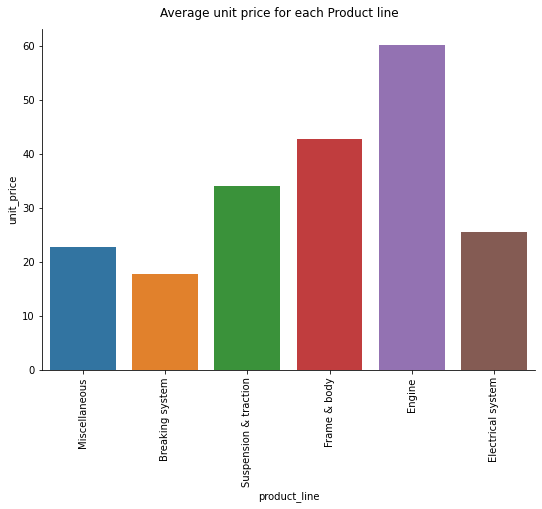

In [ ]:

g=sns.catplot(x='product_line',y='unit_price',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)
plt.xticks(rotation=90)
g.fig.suptitle("Average unit price for each Product line",y=1.03)

plt.show()

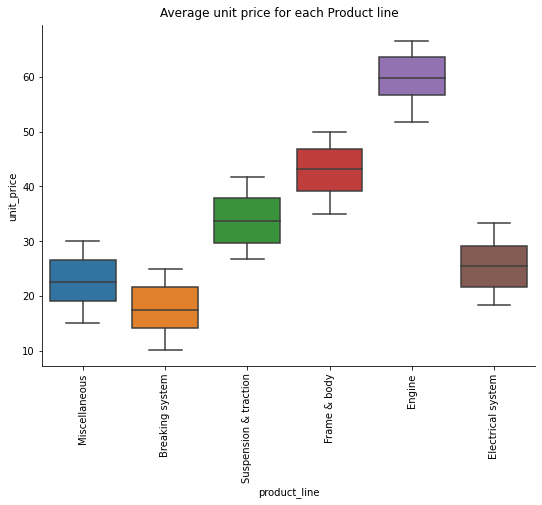

In [ ]:

g=sns.catplot(x='product_line', y='unit_price',
            data= df,
            kind='box',
            height=5.27,
            aspect=11.7/8.27)
g.fig.suptitle("Average unit price for each Product line", y=1.02)
plt.xticks(rotation=90)
plt.show()

# total purchase value by client type

In [ ]:
df.groupby('client_type')[['total']].sum().reset_index().sort_values('total',ascending=False)

,client_type,total
1,Wholesale,159642.33
0,Retail,129470.67


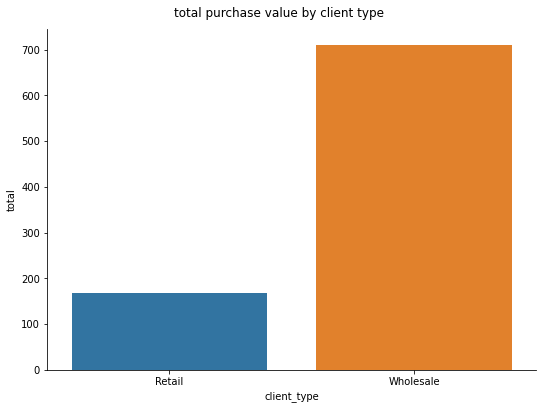

In [ ]:
g=sns.catplot(x='client_type',y='total',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)
g.fig.suptitle("total purchase value by client type",y=1.03)
plt.show()

# Average unit price for each Product line

In [ ]:
df.groupby('product_line')[['unit_price']].mean().reset_index().sort_values('unit_price',ascending=False)

,product_line,unit_price
2,Engine,60.091803
3,Frame & body,42.832229
5,Suspension & traction,33.969868
1,Electrical system,25.585130
4,Miscellaneous,22.810738
0,Breaking system,17.740522


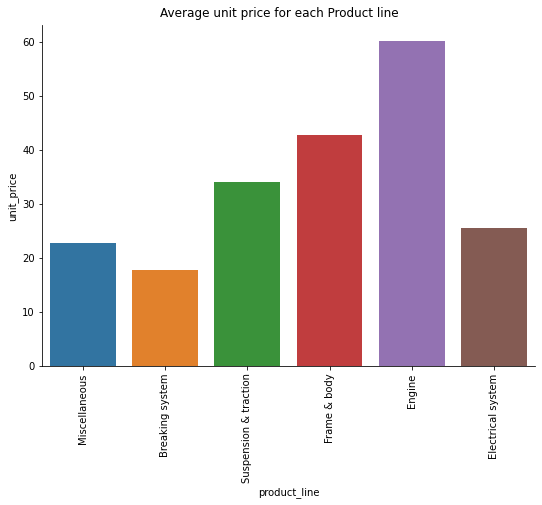

In [ ]:
g= sns.catplot(x='product_line',y='unit_price',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)
g.fig.suptitle("Average unit price for each Product line", y=1.02)
plt.xticks(rotation=90)
plt.show()

# Average purchase value by client type

In [ ]:
df.groupby('client_type')[['total']].mean().reset_index().sort_values('total',ascending=False)

,client_type,total
1,Wholesale,709.521467
0,Retail,167.058929


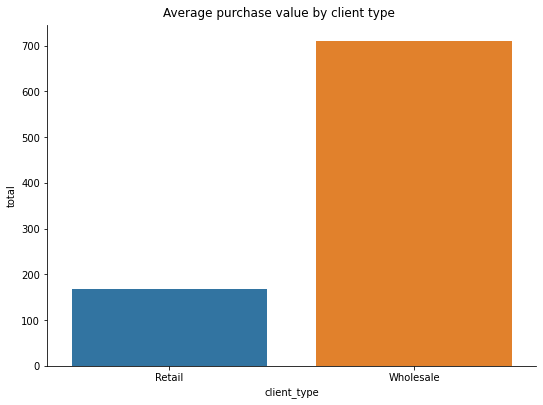

In [ ]:
g=sns.catplot(x='client_type',y='total',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)
g.fig.suptitle("Average purchase value by client type", y=1.02)
plt.show()

In [ ]:
df.groupby('product_line')[['total']].sum().reset_index().sort_values('total',ascending=False)

,product_line,total
5,Suspension & traction,73014.21
3,Frame & body,69024.73
1,Electrical system,43612.71
0,Breaking system,38350.15
2,Engine,37945.38
4,Miscellaneous,27165.82


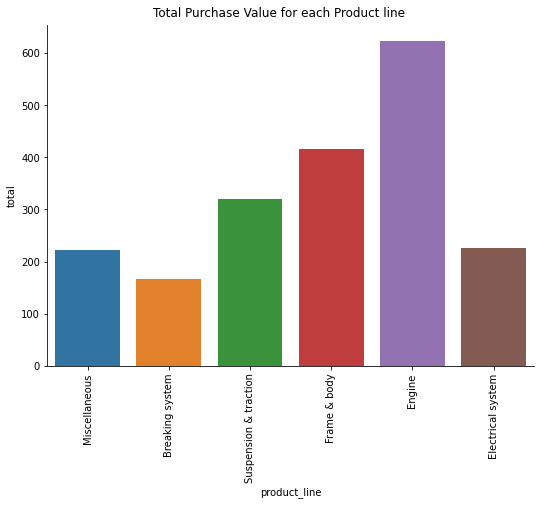

In [ ]:
g=sns.catplot(x='product_line',y='total',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)
g.fig.suptitle("Total Purchase Value for each Product line",y=1.02)
plt.xticks(rotation=90)
plt.show()

## Average Total Value for every Month

In [ ]:
df.groupby(["Month"])[["total"]].mean().reset_index().sort_values('total',ascending= False)


,Month,total
0,August,316.230473
2,June,282.011923
1,July,271.153362


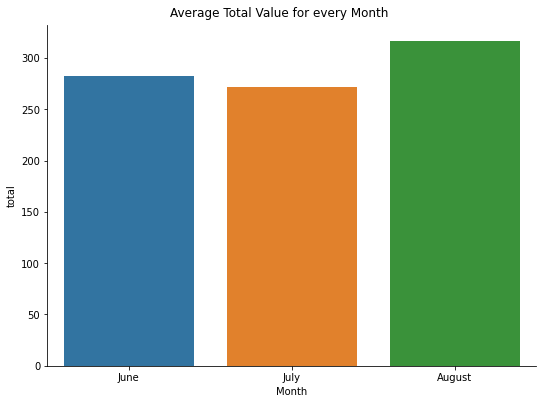

In [ ]:
g=sns.catplot(x='Month',y='total',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)
g.fig.suptitle('Average Total Value for every Month',y=1.02)
plt.show()

# Total sales across different times

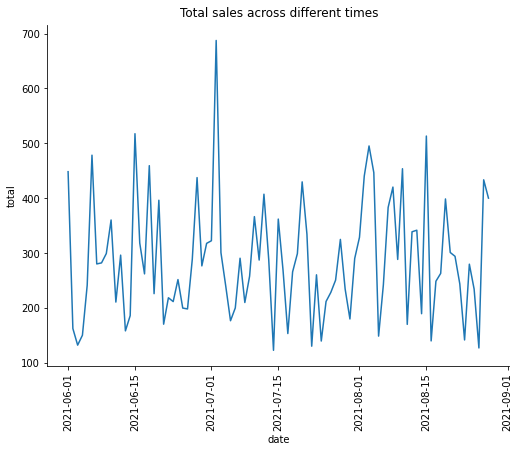

In [ ]:
g=sns.relplot(x="date", 
            y="total", 
            data=df,
            kind="line",
            ci = None,
            height=5.27,
            aspect=11.7/8.27)

g.fig.suptitle("Total sales across different times",y=1.02)
plt.xticks(rotation=90)    
plt.show()

## Total Sales Value for every Warehouse

In [ ]:
df.groupby('warehouse')[['total']].sum().reset_index().sort_values('total',ascending= False)

,warehouse,total
0,Central,141982.88
1,North,100203.63
2,West,46926.49


## Total Sales Value for every Warehouse

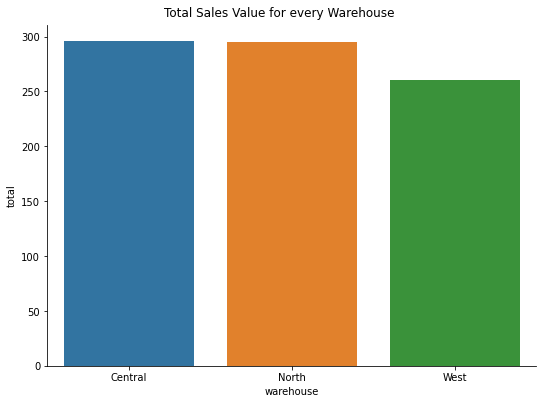

In [ ]:
g=sns.catplot(x='warehouse',y='total',
            data=df,
            kind="bar",
            ci=None,
            height=5.27,
            aspect=11.7/8.27)
g.fig.suptitle('Total Sales Value for every Warehouse',y=1.02)
plt.show()

## Summary

Based on the 3 months data.Highest Total Sales value is coming from Payment Type Transfer and North warehouse is major contriutor to it.
West warehoust is consistently reporting the Lowest average Total Sales value through out 3 months.
Highest average Total value is coming in the month of August with Engine product line having mximum contributor to it...